In [17]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import os
import matplotlib.pyplot as plt


In [13]:
df_perf = pd.read_csv('/root/BENCHMARKS/06-02-2025/datasets/application_metrics.csv')

In [5]:
folder_ = ['/root/0325_1231_mapreduce_flat/', 
           '/root/0325_1232_mapreduce_flat/', 
           '/root/0325_1233_mapreduce_flat/', 
           '/root/0325_1234_mapreduce_flat/']


In [9]:
df_node = pd.concat([pd.read_csv(file+'output_node.csv') for file in folder_], ignore_index=True)
df_func = pd.concat([pd.read_csv(file+'output_func.csv') for file in folder_], ignore_index=True)

In [14]:
df_node = df_node.sort_values(by='timestamp')
df_func = df_func.sort_values(by='timestamp')
df_perf = df_perf.sort_values(by='timestamp')

In [21]:
df_node['formated_time'] = pd.to_datetime(df_node['timestamp'], unit='s').dt.strftime('%M:%S')
df_func['formated_time'] = pd.to_datetime(df_func['timestamp'], unit='s').dt.strftime('%M:%S')
df_perf['formated_time'] = pd.to_datetime(df_perf['timestamp'], unit='s').dt.strftime('%M:%S')

In [25]:

def plot_dataframe(df, keyA, keyB, xticks_interval=None, xticks_rotation=45):
    """
    Plots the relationship between two columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    keyA (str): The column name for the x-axis.
    keyB (str): The column name for the y-axis.
    xticks_interval (int, optional): Interval for displaying x-ticks. Default is None (automatic).
    xticks_rotation (int, optional): Rotation angle for x-tick labels. Default is 45 degrees.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df[keyA], df[keyB], marker='o', linestyle='-', label=f'{keyA} vs {keyB}')
    plt.xlabel(keyA)
    plt.ylabel(keyB)
    plt.title(f'Plot of {keyA} vs {keyB}')
    plt.legend()
    plt.grid(True)

    # Adjust x-ticks
    if xticks_interval:
        plt.xticks(ticks=df[keyA][::xticks_interval], rotation=xticks_rotation)
    else:
        plt.xticks(rotation=xticks_rotation)

    plt.show()

In [22]:
df_perf.keys(), df_node.keys(), df_func.keys()  

(Index(['seed', 'entity', 'name', 'value', 'timestamp', 'formated_time'], dtype='object'),
 Index(['timestamp', 'node_uuid', 'mem_free', 'mem_used', 'mem_available',
        'proc_cpu_usage', 'proc_memory', 'proc_vmemory', 'load_avg_1',
        'load_avg_5', 'load_avg_15', 'tot_rx_bytes', 'tot_rx_pkts',
        'tot_rx_errs', 'tot_tx_bytes', 'tot_tx_pkts', 'tot_tx_errs',
        'disk_free_space', 'disk_tot_reads', 'disk_tot_writes', 'gpu_load_perc',
        'gpu_temp_cels', 'formated_time'],
       dtype='object'),
 Index(['timestamp', 'type', 'duration', 'physical_uuid', 'node_uuid',
        'logical_uuid', 'workflow_uuid', 'class_id', 'formated_time'],
       dtype='object'))

In [ ]:
df_node['mem_ratio']=df_node['mem_used']/df_node['mem_total']

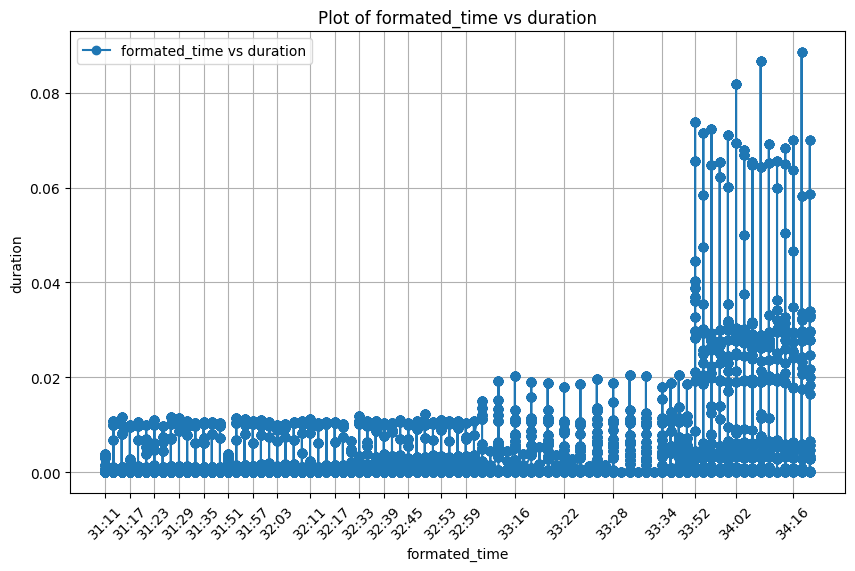

In [51]:
plot_dataframe(df_func, 'formated_time', 'duration', xticks_interval=2000)

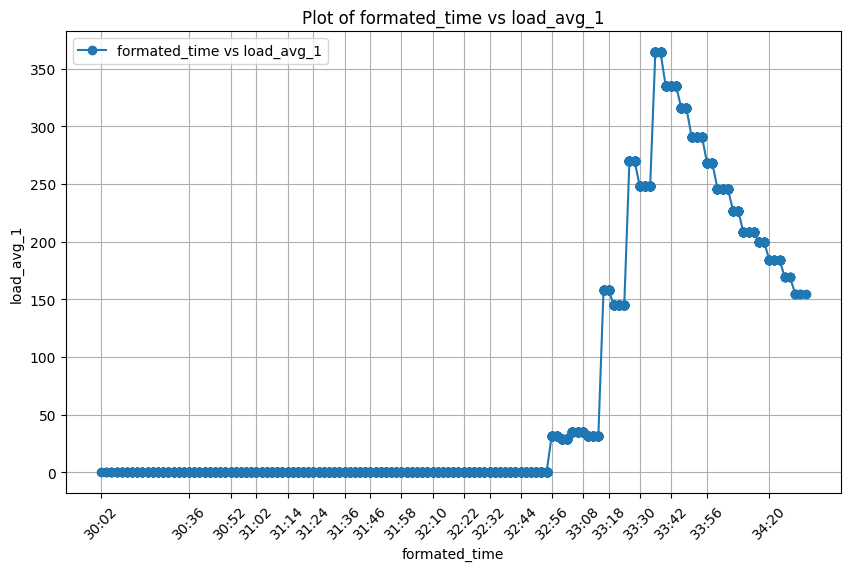

In [44]:
plot_dataframe(df_node, 'formated_time', 'load_avg_1', xticks_interval=150)

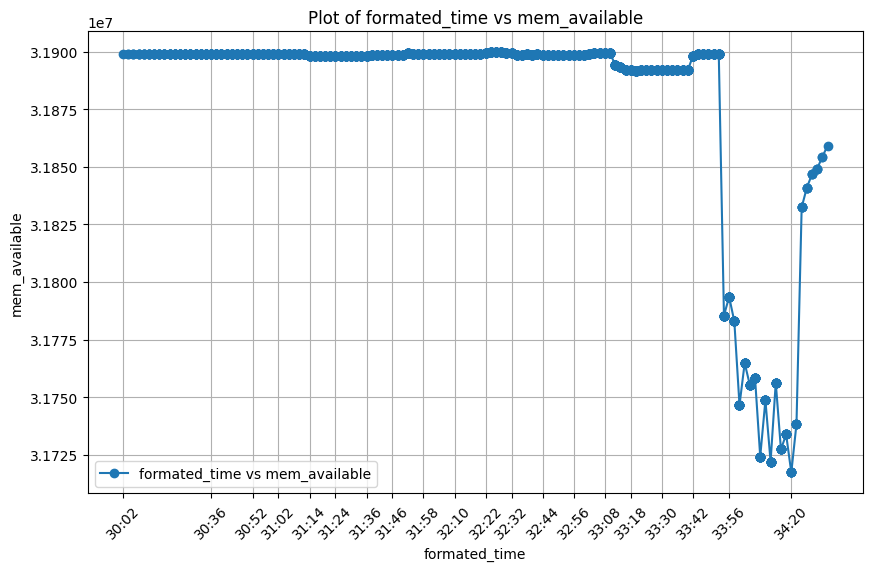

In [ ]:
plot_dataframe(df_node, 'formated_time', 'mem_available', xticks_interval=150)

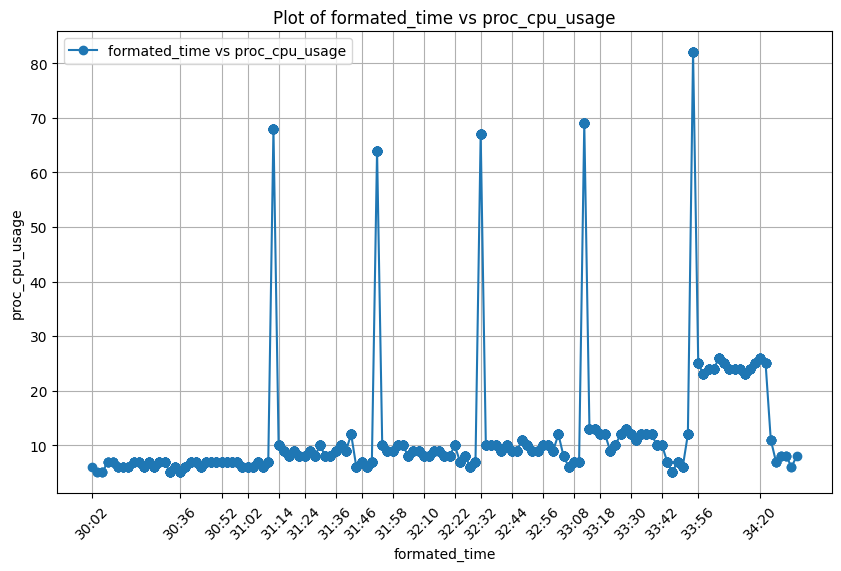

In [ ]:
plot_dataframe(df_node, 'formated_time', 'proc_cpu_usage', xticks_interval=150)

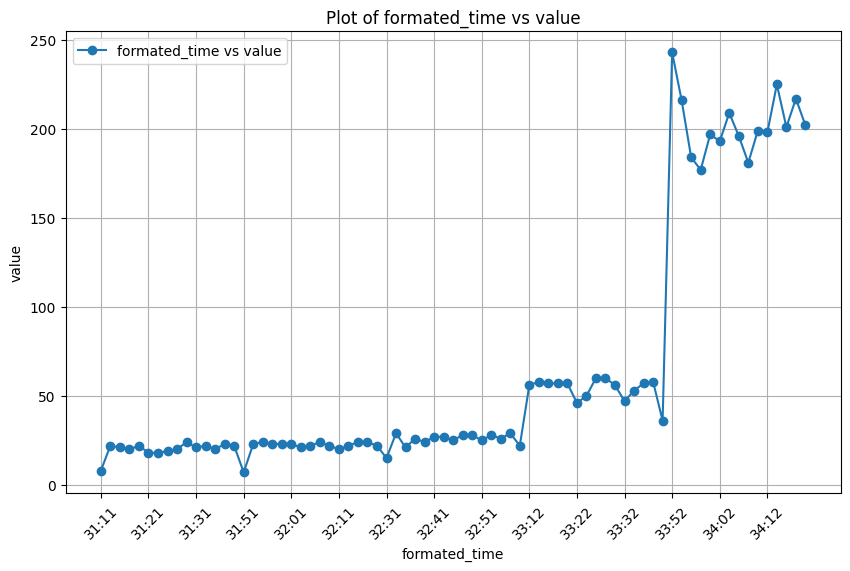

In [ ]:
plot_dataframe(df_perf, 'formated_time', 'value', xticks_interval=5)